c:\VunofinalprojectNew\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(512, 512, 3) (512, 512, 3)
0.99081844 0.0032611224


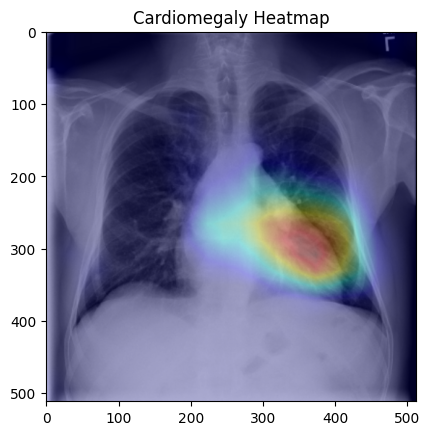

No heatmap available for pneumothorax.


In [7]:
import sys
import os
import matplotlib.pyplot as plt
from pathlib import Path
import timm
import matplotlib.pyplot as plt

# 현재 디렉토리의 부모 디렉토리를 추가하여 Python이 모듈을 찾을 수 있도록 합니다.
module_path = Path(r'C:\VunofinalprojectNew')  # VunofinalprojectNew의 상위 경로
sys.path.append(str(module_path))

# inference.py 모듈을 임포트합니다.
from locallibrary.catalog.inference import ChestMateRunner

# 모델 가중치와 이미지 경로를 설정합니다.
path_to_weight = './model_cmptx.pth'
path_to_image = r'C:\VunofinalprojectNew\locallibrary\media\ximages\00000001_000.png'

# ChestMateRunner 인스턴스를 생성합니다.
runner = ChestMateRunner(path_to_weight)

# 이미지를 처리합니다.
outputs = runner.run(path_to_image)

# 결과를 출력합니다.
print(outputs['cardiomegaly']['score'], outputs['pneumothorax']['score'])

# heatmap을 시각화합니다.
if outputs['cardiomegaly']['heatmap'] is not None:
    plt.imshow(outputs['cardiomegaly']['heatmap'])
    plt.title('Cardiomegaly Heatmap')
    plt.show()
else:
    print("No heatmap available for cardiomegaly.")

if outputs['pneumothorax']['heatmap'] is not None:
    plt.imshow(outputs['pneumothorax']['heatmap'])
    plt.title('Pneumothorax Heatmap')
    plt.show()
else:
    print("No heatmap available for pneumothorax.")
